In [2]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jaejin/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/jaejin/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [5]:
from nltk.corpus import gutenberg

len(gutenberg.fileids())

18

In [6]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

### Tokenize text

In [7]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [8]:
gberg_sent_tokens[0:6]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.',
 "Even before Miss Taylor had ceased to hold the nominal

In [11]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [12]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [14]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [15]:
gberg_sents = gutenberg.sents()

In [16]:
gberg_sents[0:6]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.'],
 ['Her',
  'mother',
  'h

In [17]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [18]:
gberg_sents[4][14]

'father'

In [19]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [20]:
len(gutenberg.words())

2621613

### Run word2vec

In [25]:
model = Word2Vec(sentences=gberg_sents, vector_size=64, sg=1, window=10,
                 epochs=5, min_count=5, workers=38)

In [26]:
model.save('raw_gutenberg_model.w2v')

### Explore model

In [47]:
# model = gensim.models.Word2Vec.load('raw_gutenberg_model.w2v')
model = Word2Vec.load('raw_gutenberg_model.w2v')

In [48]:
model.wv['dog']

array([ 4.3734127e-01, -3.1633425e-01,  3.3116147e-01,  4.7877160e-01,
       -2.8990936e-01, -2.9230192e-01,  1.8071629e-01, -5.8514768e-01,
        5.3736541e-02,  5.2549630e-01,  5.9877890e-01, -5.4035294e-01,
       -6.1813872e-02, -9.4107136e-02, -1.2253748e-01,  1.1277969e+00,
       -7.7307783e-04, -5.8352919e-03, -4.5254639e-01,  1.1638409e-01,
        1.6936384e-01,  2.0488153e-01,  2.9660818e-01,  3.3951396e-01,
        9.0644777e-02,  5.1145202e-01, -2.8130102e-01, -1.5698241e-01,
       -1.1084916e-01,  1.3672535e-01, -4.8794698e-02, -2.6255194e-02,
       -7.0246272e-02, -3.0801976e-01, -2.6799107e-01, -3.4147967e-02,
        4.3658340e-01,  2.2889102e-01,  8.9430735e-02, -3.2927141e-02,
       -1.9804576e-01,  1.2858930e-01,  1.7008673e-01, -1.6904783e-01,
        5.8338657e-02, -2.4563652e-01, -2.5767008e-02,  1.0442908e-01,
       -1.6435663e-01,  3.9029756e-01, -3.3454653e-02, -1.7610179e-01,
        3.4897131e-01,  2.0320833e-01, -5.2382439e-02,  1.4105801e-01,
      

In [49]:
len(model.wv['dog'])

64

In [50]:
model.wv.most_similar('dog')

[('puppy', 0.801704466342926),
 ('butcher', 0.7440139651298523),
 ('cage', 0.7413684129714966),
 ('bridle', 0.7373477220535278),
 ('broth', 0.7360455393791199),
 ('steward', 0.7302228212356567),
 ('wid', 0.7226400375366211),
 ('kick', 0.7202775478363037),
 ('boy', 0.7201535701751709),
 ('cow', 0.7170166373252869)]

In [51]:
model.wv.most_similar('think')

[('know', 0.8484994769096375),
 ('believe', 0.830501139163971),
 ('contradict', 0.8278449177742004),
 ('Mamma', 0.8271905183792114),
 ('manage', 0.8266874551773071),
 ('really', 0.8181538581848145),
 ('pretend', 0.8175240159034729),
 ('suppose', 0.8156672120094299),
 ('behave', 0.8095802068710327),
 ('understand', 0.807368278503418)]

In [52]:
model.wv.most_similar('day')

[('morning', 0.7690088748931885),
 ('night', 0.7430444359779358),
 ('month', 0.7350415587425232),
 ('time', 0.7349089980125427),
 ('week', 0.6919811964035034),
 ('feasting', 0.6851531863212585),
 ('evening', 0.678568422794342),
 ('Adar', 0.6654772162437439),
 ('Saturday', 0.6596137285232544),
 ('afternoon', 0.6557440161705017)]

In [53]:
model.wv.most_similar('father')

[('mother', 0.8741949796676636),
 ('brother', 0.841997504234314),
 ('sister', 0.8152643442153931),
 ('wife', 0.7835106253623962),
 ('daughter', 0.7795438766479492),
 ('Amnon', 0.7362167239189148),
 ('younger', 0.7303298115730286),
 ('uncle', 0.7271857261657715),
 ('Tamar', 0.7259503602981567),
 ('concubine', 0.7109166383743286)]

In [54]:
model.wv.doesnt_match("mother father daughter dog".split())

'dog'

In [55]:
model.wv.similarity('father', 'dog')

0.47650945

In [56]:
model.wv.most_similar(positive=['father', 'woman'], negative=['man'])                                                            

[('daughter', 0.7817261219024658),
 ('husband', 0.7799778580665588),
 ('wife', 0.7797707915306091),
 ('sister', 0.7778849601745605),
 ('mother', 0.7721685767173767),
 ('brother', 0.7324772477149963),
 ('Rachel', 0.7291067838668823),
 ('Leah', 0.6992649435997009),
 ('Sarah', 0.6840817928314209),
 ('Isaac', 0.6824498176574707)]

In [57]:
model.wv.most_similar(positive=['son', 'woman'], negative=['man'])

[('Leah', 0.7556246519088745),
 ('daughter', 0.7349348068237305),
 ('wife', 0.7222110033035278),
 ('Rachel', 0.720385730266571),
 ('Hagar', 0.7156644463539124),
 ('Sarai', 0.7122352719306946),
 ('Abram', 0.7081058621406555),
 ('Sarah', 0.705356776714325),
 ('Bethuel', 0.6962607502937317),
 ('Jephunneh', 0.684465229511261)]

In [58]:
model.wv.most_similar(positive=['husband', 'woman'], negative=['man'])                               

[('wife', 0.7231227159500122),
 ('sister', 0.6880078315734863),
 ('daughter', 0.6843565702438354),
 ('widow', 0.6596343517303467),
 ('mother', 0.6547088027000427),
 ('maid', 0.651328980922699),
 ('Rachel', 0.6499711871147156),
 ('child', 0.6445977687835693),
 ('conceived', 0.6430765390396118),
 ('nurse', 0.641255795955658)]

In [59]:
model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=30)

[('Rachel', 0.6916755437850952),
 ('Sarah', 0.6887333989143372),
 ('Abram', 0.6644474864006042),
 ('Leah', 0.661774754524231),
 ('Padanaram', 0.6566655039787292),
 ('Babylon', 0.6520406007766724),
 ('Laban', 0.6489713191986084),
 ('daughter', 0.6468513607978821),
 ('Sarai', 0.64504075050354),
 ('tribute', 0.6391503810882568),
 ('queen', 0.6363052725791931),
 ('Vashti', 0.6310659646987915),
 ('Judah', 0.6307970285415649),
 ('servants', 0.6289113163948059),
 ('Rebekah', 0.6210212111473083),
 ('Bethuel', 0.6207702159881592),
 ('Hagar', 0.6205583214759827),
 ('Ephron', 0.6197887063026428),
 ('Hanun', 0.6186575889587402),
 ('Abraham', 0.61636883020401),
 ('Hamor', 0.6138871908187866),
 ('Cain', 0.6086239814758301),
 ('Isaac', 0.6086214780807495),
 ('Abimelech', 0.6078371405601501),
 ('Samaria', 0.605681836605072),
 ('Pharaoh', 0.6047300696372986),
 ('wife', 0.6028764247894287),
 ('Jerubbaal', 0.6005388498306274),
 ('David', 0.6005282402038574),
 ('Onan', 0.6002594232559204)]

### Reduce word vector dimensionality with t-SNE

In [82]:
len(model.wv.index_to_key)

17011

In [83]:
X = model.wv[model.wv.index_to_key]

In [84]:
tsne = TSNE(n_components=2, n_iter=1000)

In [85]:
X_2d = tsne.fit_transform(X)

In [86]:
X_2d[0:5]

array([[ -9.984601, -40.097332],
       [ -9.56333 , -39.608162],
       [ -9.617941, -40.135437],
       [-10.47238 , -41.194904],
       [ -9.183269, -39.932674]], dtype=float32)

In [87]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.index_to_key

In [88]:
coords_df.head()

,x,y,token
0,-9.984601,-40.097332,","
1,-9.563330,-39.608162,the
2,-9.617941,-40.135437,and
3,-10.472380,-41.194904,.
4,-9.183269,-39.932674,of


### Visualize 2D representation of word vectors

In [89]:
coords_df = pd.read_csv('raw_gutenberg_tsne.csv')

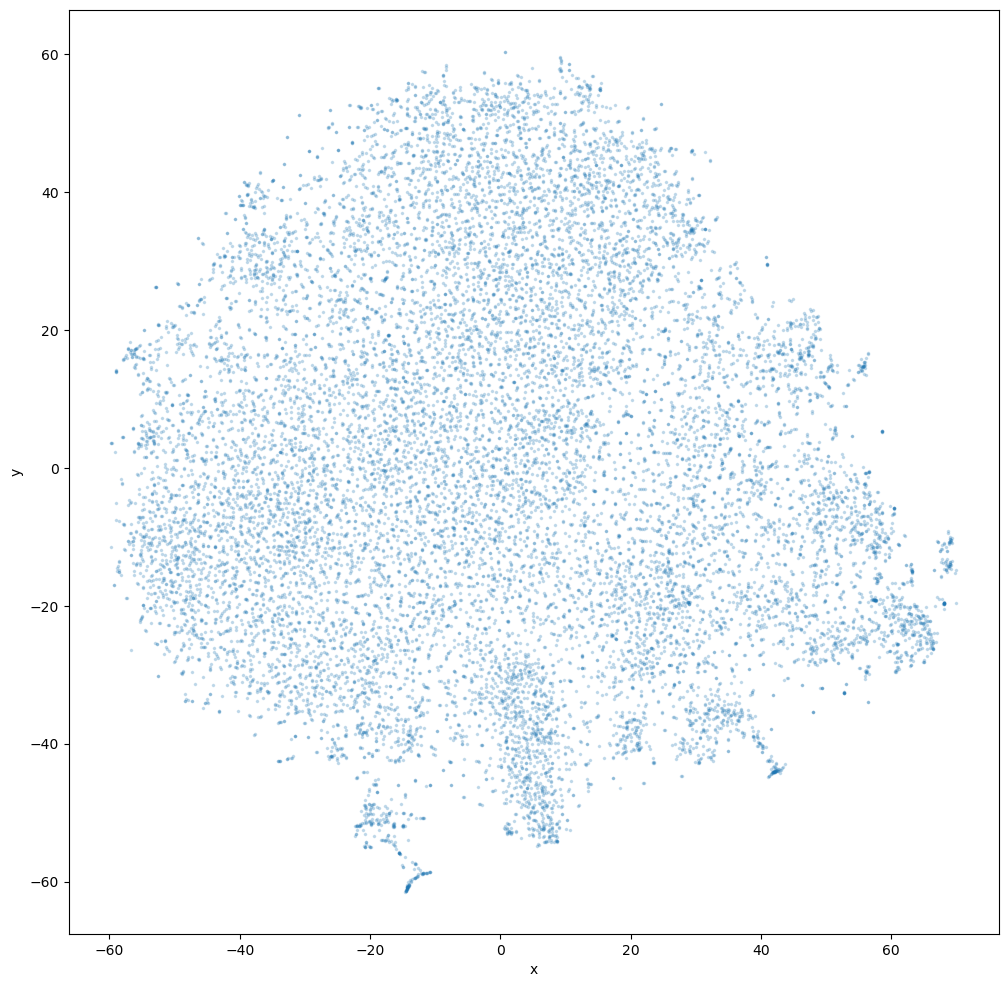

In [90]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12),
                           marker='.', s=10, alpha=0.2)

In [91]:
output_notebook()

Loading BokehJS ...

In [103]:
subset_df = coords_df.sample(n=5000)

In [104]:
p = figure(width=800, height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

show(p)